---
# 0. 라이브러리
----

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 설치 위치 이동
%cd /content/drive/MyDrive/2.Study/ML/Mecab

/content/drive/MyDrive/2.Study/ML/Mecab


---
### 0-1. Mecab 설치
---

In [7]:
!pip install konlpy

from konlpy.tag import Mecab
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 42.9 MB/s eta 0:00:00
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/drive/MyDrive/2.Study/ML/Mecab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-02-17 06:34:38--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting

In [24]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


---
### 설치 후 런타임 재시작 필요
---

In [3]:
import re 
from konlpy.tag import Mecab
from tqdm.notebook import tqdm
import re
import pickle
import csv
import pandas as pd

import numpy as np

---
# 1. 데이터
----

In [4]:
data = pd.read_csv('/content/drive/MyDrive/1. AIFFEL/AIFFELTON/data/final_crawling_dataset.csv', index_col = 0)
data

,review,total_scope
0,콜라 시켰는데 안옴 전화해서 문의를 하니 핸드폰은 됐는데 컴퓨터 상으로는 안됐다 함...,1
1,처음 먹어보는 로제피자 맛있었어요 하지만 포장이 별로네요 배달하시는분 오해할만 포장...,2
2,토핑없는수준 ㅋㅋ,1
3,오랜만에 주문했더니 전보다 많이 얇아졌어요,3
4,주문한지 2시간 가까이 되서 배달옴 스파게티 치킨 피자 다 식어서 옴 스파게티는 쏘...,1
...,...,...
44888,잘 먹었습니다 서비스로 날치알밥도 맛있게 잘 먹었어요,5
44889,항상 여기서 시켜먹어요 다 좋아요,5
44890,가성비 최고 맛도 웬만한가게보다 훨씬나아요 앞으로 자주먹을듯,5
44891,배달빠르고 맛보기 무침족발 새콤달콤하니 맛있어요,5


---
### 1-1. preprocessing
----

In [5]:
tokenizer = Mecab()

tokenizer.pos(data['review'][1])

[('처음', 'MAG'),
 ('먹', 'VV'),
 ('어', 'EC'),
 ('보', 'VX'),
 ('는', 'ETM'),
 ('로제', 'NNG'),
 ('피자', 'NNG'),
 ('맛있', 'VA'),
 ('었', 'EP'),
 ('어요', 'EF'),
 ('하지만', 'MAJ'),
 ('포장', 'NNG'),
 ('이', 'JKS'),
 ('별로', 'MAG'),
 ('네요', 'VCP+EC'),
 ('배달', 'NNG'),
 ('하', 'XSV'),
 ('시', 'EP'),
 ('는', 'ETM'),
 ('분', 'NNB'),
 ('오해', 'NNG'),
 ('할', 'XSV+ETM'),
 ('만', 'NNB'),
 ('포장', 'NNG'),
 ('이', 'VCP'),
 ('에요', 'EF'),
 ('치킨', 'VV+ETM'),
 ('박스', 'NNG'),
 ('는', 'JX'),
 ('테이프', 'NNG'),
 ('떼', 'VV+EC'),
 ('져', 'VX+EC'),
 ('있', 'VX'),
 ('고', 'EC'),
 ('피자', 'NNG'),
 ('박스', 'NNG'),
 ('는', 'JX'),
 ('꺽', 'VV'),
 ('여서', 'EC'),
 ('열려', 'VV+EC'),
 ('있', 'VX'),
 ('고', 'EC'),
 ('셔', 'NNG'),
 ('버트', 'NNG'),
 ('는', 'JX'),
 ('질질', 'MAG'),
 ('새', 'VV'),
 ('네요', 'EC')]

- 품사 태그표 링크 :http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html

In [6]:
# 품사 골라내기 
''' NNG = 일반 명사 / NNP = 고유 명사 / VA = 형용사 / XR = 어근'''

def get_nouns(tokenizer, sentence):
    tag = tokenizer.pos(sentence)
    nouns = [s for s, t in tag if t in ['NNG', 'NNP', 'VA', 'XR'] and len(s) >1]
    return nouns

def tokenize(df):
    processed_data = []
    for sent in tqdm(df):
        processed_data.append(get_nouns(tokenizer, sent))
    return processed_data

def save_processed_data(processed_data):
    with open('review_mecab_tag.csv', 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)    

In [7]:
save_processed_data(tokenize(data['review']))

  0%|          | 0/44893 [00:00<?, ?it/s]

---
### 1-2. csv로 파일 읽기
----

In [8]:
with open('review_mecab_tag.csv', 'r') as file:
  reader = csv.reader(file)
  count = 0
  for i in reader:
    print(i)
    count += 1
    if count == 20:
      break

['콜라', '전화', '문의', '핸드폰', '컴퓨터', '죄송', '피자', '소스', '범벅']
['로제', '피자', '맛있', '포장', '배달', '오해', '포장', '박스', '테이프', '피자', '박스', '버트']
['토핑', '수준']
['오랜만', '주문']
['주문', '배달', '스파게티', '피자', '스파게티', '스랑', '비지', '오븐', '치킨', '테두리', '두껍']
['주문', '시간', '음식', '책임']
['생각', '만족', '도우', '치즈', '추가']
['피자', '맛있', '국물', '복이', '사진', '개봉']
['가격']
['퐁듀', '소스', '느낌', '토마토', '소스', '느끼', '토마토', '소스', '고춧가루', '시카고', '피자', '맛있']
['피자', '맛있', '치킨', '완전', '비추', '치킨', '탈락']
['토핑', '피자', '자체', '치즈', '촉촉', '고기', '토핑', '퍽퍽']
['치킨', '편의점', '치킨', '느끼', '싸구려', '튀김', '피자', '그렇', '이상', '후회']
['파스타', '마늘', '마늘', '피자', '치즈']
['가격', '피자', '느끼']
[]
['동안', '전화', '라이더', '피자', '시간', '네요']
['값어치', '사이즈', '라면', '사이즈']
['가난', '피자', '빈약', '가격', '크기', '그렇', '도우']
['실망', '주문', '배달', '정도', '인지', '연락', '주문', '이해', '정도', '연락', '배달', '출발', '연락', '배달원', '연락', '연락', '연락', '배달', '시간', '시간', '가량', '감사']


In [9]:
pd.DataFrame(tokenize(data['review']))

  0%|          | 0/44893 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,콜라,전화,문의,핸드폰,컴퓨터,죄송,피자,소스,범벅,None,...,None,None,None,None,None,None,None,None,None,None
1,로제,피자,맛있,포장,배달,오해,포장,박스,테이프,피자,...,None,None,None,None,None,None,None,None,None,None
2,토핑,수준,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,오랜만,주문,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,주문,배달,스파게티,피자,스파게티,스랑,비지,오븐,치킨,테두리,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,서비스,치알,맛있,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
44889,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
44890,가성,최고,웬만,가게,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
44891,배달,빠르,무침,족발,새콤달콤,맛있,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


---
### 1-3. 공백을 제거하고 List로 만들기
---

In [10]:
dataset = []

with open('review_mecab_tag.csv', 'r') as file:
  reader = csv.reader(file)
  for i in reader:
    if i == [] : # 공백 제거 
      continue
    else :
      dataset.append(i)

In [11]:
len(dataset)

41957

----
# 2. LDA 토픽 모델링
----

In [12]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

---
### 2-1. 고유한 단어들의 사전 생성
----

In [13]:
dictionary = corpora.Dictionary(dataset)
len(dictionary)

7568

---
### 2-2. 사전 필터링
----

빈도가 n개 이상인 단어와 전체 단어의 x% 이상을 차지하는 단어는 필터링

In [14]:
dictionary.filter_extremes(no_below = 2, no_above = 0.5)
len(dictionary)

4054

----
### 2-3. bag of word
----

In [15]:
corpus = [dictionary.doc2bow(text) for text in dataset]
len(corpus)

41957

---
# 3. 모델링
---

- 텍스트 데이터에서 사용된 주제어들의 동시 사용 패턴을 바탕으로 해당 텍스트들을 대표하는 특정 주제나 이슈, 그룹들을 자동으로 추출하는 분석 기법

- 토픽은 함께 등장할 확률이 높고 유사한 의미를 가지는 단어들의 집합

- 텍스트 내 단어들의 빈도를 통계적으로 분석하여 전체 데이터를 관통하는 잠재적 주제  
  즉, 토픽들으 자동으로 추출하는 분류 기법이며, 프레임 분석 시 유용

  

In [16]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt 

---
### 3-1. 최적의 Topic 수 찾기
---

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 80;
    start = 2;
    step = 4;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

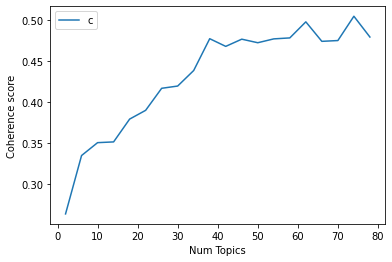

In [18]:
find_optimal_number_of_topics(dictionary, corpus, dataset)

---
### 3-2. 학습
----

- num_topics = 생성될 토픽의 개수

- chunksize = 한번에 학습 처리될 문서의 개수

- passes = 전체 코퍼스 트레이닝 횟수

- iterations = 문서 당 반복 횟수 

In [20]:
num_topics = 62
passes = 30
chunksize = 500
iterations = 500

In [21]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

lda_model = LdaModel(corpus, id2word=dictionary, 
                     num_topics = num_topics, 
                     passes = passes, 
                     chunksize = chunksize, 
                     iterations = iterations,
                     callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(25, '0.478*"보쌈" + 0.175*"양념" + 0.121*"포장" + 0.076*"후라이드" + 0.050*"실망"')
(37, '0.212*"예정" + 0.208*"입맛" + 0.071*"나쁘" + 0.065*"인생" + 0.062*"중간"')
(5, '0.362*"추천" + 0.111*"크기" + 0.107*"담백" + 0.052*"부대찌개" + 0.034*"결제"')
(18, '0.149*"너겟" + 0.080*"비스" + 0.061*"내용물" + 0.061*"말씀" + 0.057*"나중"')
(20, '0.463*"빠르" + 0.399*"배달" + 0.083*"오늘" + 0.030*"쿠폰" + 0.002*"네영"')
(4, '0.451*"튀김" + 0.285*"도착" + 0.041*"뜨겁" + 0.022*"종이" + 0.018*"비추"')
(27, '0.670*"감사" + 0.143*"정도" + 0.031*"고민" + 0.028*"사이드" + 0.023*"기간"')
(21, '0.227*"막국수" + 0.156*"김치" + 0.138*"대박" + 0.073*"완벽" + 0.065*"개인"')
(46, '0.701*"소스" + 0.050*"샐러드" + 0.029*"토마토" + 0.013*"리치" + 0.012*"요오"')
(45, '0.293*"기사" + 0.143*"예전" + 0.129*"맛없" + 0.086*"해피" + 0.043*"용기"')
(40, '0.334*"마늘" + 0.195*"처음" + 0.066*"부탁" + 0.044*"라지" + 0.034*"선택"')
(60, '0.096*"수고" + 0.096*"느리" + 0.070*"옛날" + 0.050*"시작" + 0.049*"출발"')
(13, '0.235*"불고기" + 0.139*"고구마" + 0.088*"친구" + 0.087*"사랑" + 0.058*"콰트로"')
(3, '0.191*"냄새" + 0.177*"강추" + 0.147*"이상" + 0.127*"쟁반국수" + 0.054*"따

In [22]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)

# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)    


Coherence Score (c_v):  0.5433306985354568

Coherence Score (u_mass):  -17.351736116843465


In [23]:
top_topics = lda_model.top_topics(corpus) #, num_words=20)

from pprint import pprint
pprint(top_topics)

[([(0.18804747, '버거'),
   (0.12492386, '버거킹'),
   (0.08983213, '맥도날드'),
   (0.038045462, '식후'),
   (0.022019537, '패티'),
   (0.021814901, '넉넉'),
   (0.018883383, '불향'),
   (0.01504168, '순대'),
   (0.014746059, '빨대'),
   (0.014422747, '애용'),
   (0.014406264, '편하'),
   (0.013245847, '이유'),
   (0.012462931, '달비'),
   (0.00998291, '달료'),
   (0.009387668, '역쉬'),
   (0.008757196, '속도'),
   (0.008583114, '궁금'),
   (0.00836746, '림프'),
   (0.008175554, '세상'),
   (0.007835041, '국밥')],
  -14.715900087442094),
 ([(0.6700066, '감사'),
   (0.14336134, '정도'),
   (0.030596176, '고민'),
   (0.028047193, '사이드'),
   (0.022716241, '기간'),
   (0.015603829, '아이스티'),
   (0.014230601, '당황'),
   (0.013713877, '최근'),
   (0.0073738485, '시큼'),
   (0.0041949577, '이제'),
   (0.0040832334, '그동안'),
   (0.0039034043, '배려'),
   (0.003490412, '레몬'),
   (0.003197393, '당연'),
   (0.0029217685, '풍족'),
   (0.0024444158, '상냥'),
   (0.002275185, '비빔'),
   (0.002267727, '크림빵'),
   (0.0020620388, '신맛'),
   (0.0018610159, '마늘빵')],
  -15.

---
# 4. 시각화
---

In [25]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [26]:
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


- 원의 크기 = 해당 토픽이 전체 글에서 차지하느 비중

- 토픽 각 원의 위치 = 토픽 간 확률 분포의 유사성에 따라 다차원 척도로 정한 것
  
  - 확룰 분포의 유사성은 젠슨-섀넌 발산(jenson-shannon Divergence) 지수를 계산한 것 

  - 토픽간의 확률 분포가 비슷하다면(가깝다면) 해당 토픽들이 서로 유사하다는 것을 의미

-   


- KLD = 두 모델이 얼마나 비슷하게 생겼는지를 알기 위한 척도이며, 제시한 모델이 실제 모델의 각 item들의 정보량을 얼마나 잘 보존할 수 있는가 측정하는 지표  
  
  다시 말하면, 원본 데이터가 가지는 정보량을 잘 보존할 수록 원본 데이터와 비슷한 모델

    - 원본 확률 분포 p와 근사된 분포 q에 대해서 i번째 item이 가진 정보량의 차이(정보 손실량) 

      $I_i = log(p_i) - log(q_i)$

    - p에 대한 정보 손실량의 기댓값이 바로 KL-Divergence

      $D_{KL}(p||q) = E[log(p_i) - log(q_i)] = \sum p_ilog \frac{P_i}{q_i}$

  ---

- KLD는 근사된 확률 분포가 얼마나 원본과 비슷한지를 측정하는 척도 외에도 

- 단순히 두 대등한 확률 분포가 얼마나 닮았는지를 측정하는 척도로도 쓰일 수 있음

- 하지만 KLD는 대칭적이지 않다  
  
  즉, $D_{KL}(p||q) \ne D_{KL}(q||[)$

- 이를 대칭적으로 개량한 것이 젠슨-섀넌 발산이다.
  
- $JSD(p,q) = \frac{1}{2}D_{KL}(p||\frac{p+q}{2}) + \frac{1}{2}D_{KL}(q||\frac{p+q}{2})$

In [27]:
pyLDAvis.display(lda_visualization)